<h1> Комментарий ревьюера </h1>

Привет, Георгий!
Меня зовут Виктория Ильина, и я буду проверять твой проект. Предлагаю общаться на "ты", но если тебе будет не комфортно, обязательно сообщи и мы перейдем на "вы". 

Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе стать специалистом по Data Science. Ты уже проделал большую работу над проектом, но давай сделаем его ещё лучше. Ниже ты найдёшь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать различные цвета, чтобы было легче воспринимать мои комментарии:

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера🤔:</b> Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Однако, если перед нами стоит цель не просто сдать проект и забыть, а приобрести новые знания и успешно применять их в будущем, я бы всё-таки рекомендовала тебе прорабатывать эти недочёты.
</div>
    
<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Так я выделю все остальные комментарии.
</div>
    
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии - пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Например, вот так.
</div>

Давай посмотрим, что получилось!

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
display(df)
print(df.info())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None


Наличие дубликатов

In [4]:
# проверим на наличие дупликатов
df.duplicated().sum()

153

In [5]:
# Посмотрим на дубликаты
df[df.duplicated(keep=False)].sort_values(by='Зарплата')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
2955,1,32.0,21600.0,0,0
2988,1,32.0,21600.0,0,0
361,0,50.0,24700.0,1,2
2869,0,50.0,24700.0,1,2
333,0,32.0,25600.0,1,0
...,...,...,...,...,...
2465,0,40.0,54000.0,2,0
1042,0,33.0,59300.0,2,0
2231,0,33.0,59300.0,2,0
1418,1,28.0,59900.0,0,0


In [6]:
# удалим их
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

Тип столбцов

In [7]:
# У столбцов возраст и зарплата тип float64. Изменим на Int64
df[['Возраст', 'Зарплата']] = df[['Возраст', 'Зарплата']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int64
 1   Возраст            4847 non-null   int64
 2   Зарплата           4847 non-null   int64
 3   Члены семьи        4847 non-null   int64
 4   Страховые выплаты  4847 non-null   int64
dtypes: int64(5)
memory usage: 189.5 KB


In [8]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811223,1.203425,0.152259
std,0.500049,8.487995,9972.952441,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [9]:
df.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.001953,0.015456,-0.007315,0.011565
Возраст,0.001953,1.000000,-0.017386,-0.009064,0.654964
Зарплата,0.015456,-0.017386,1.000000,-0.031687,-0.013123
Члены семьи,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
Страховые выплаты,0.011565,0.654964,-0.013123,-0.039303,1.000000


<AxesSubplot:xlabel='Возраст'>

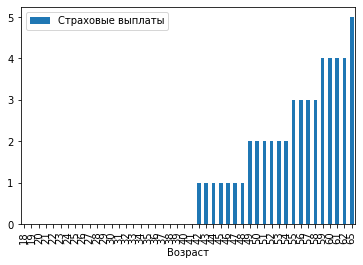

In [10]:
insurance_age = df.pivot_table(index='Возраст', values='Страховые выплаты', aggfunc='median')
insurance_age.plot(y='Страховые выплаты', kind='bar')

In [11]:
df[df['Возраст']==65]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
228,1,65,39700,1,5


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Отлично!
    
Этого не было в требованиях к проекту, просто дополнительно по EDA:
    
Если использовать функцию describe(), то можно увидеть, что в таблице данных компании соблюден почти идеальный баланс между мужчинами и женщинами. Средний возраст застрахованного составляет около 31 года, при этом медиана составляет 30. Границы возраста застрахованных приводят к выводу, что компания не занимается страхованием лиц, чей возраст составляет менее 18 и старше 65 лет. Также интересно взглянуть на уровень заработной платы застрахованных - медиана составляет чуть более 40 000 рублей. В целом, в компании скорее представлен средний экономический класс, чем слишком бедные или слишком богатые граждане. 
    
Дополнительно можно было бы посмотреть корреляцию. Возраст и количество страховых выплат клиенту за последние 5 лет имеют корреляцию 0.651. Вероятно, для компании есть взаимосвязь: чем старше застрахованное лицо, тем более вероятно он потребует страховку чаще, следовательно, несёт в себе больше рисков для предприятия.

Если подробнее изучить эту связь, то можно узнать, что все клиенты в возрасте до 42 лет не получали ни одной страховой выплаты, в возрасте до 49 лет только одну выплату, до 55 лет две выплаты, до 59 лет три выплаты, до 65 лет четыре выплаты. Только один клиент получил максимальное количество выплат за пять лет - пять выплат в возрасте 65 лет
</div>


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера🤔:</b> отсутствует промежуточный вывод
</div>

**Вывод**<br>

Были обнаруженные и удалены дубликаты, изменены типы столбцов, и проанализированны данные в таблице:
- Мужчин и женщин примерно одинаковое количество
- Возраст:
    - Диапазон возрастов от 18 до 65 лет
    - Средний возраст 31 год
    - 75% людей в возрасте до 37 лет
- Средняя зарплата составляет примерно 40 тыс.

Также видна корреляция между возрастом и страховыми выплатами: 0.654.<br>
Если мы построим barplot, то увидим, что людям до 42 лет не выплачивали ни одной выплаты. С 42 до 49 лет по одной. С 49 до 55 лет две выплаты. С 55 до 59 три выплаты, с 59 лет до 65 лет четыре выплаты. Только в 65 лет человеку было выплачено 5 раз.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Звучит подзадание так:** <br>
Признаки умножают на обратимую матрицу.<br> 
Изменится ли качество линейной регрессии? (Её можно обучить заново.)<br>
- a. Изменится. Приведите примеры матриц.<br>
- b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.<br>

**Ответ:** Не изменится

**Доказательство:** 

1) Заменим $X$ на $I$, где $L$ - Обратимая матрица: $$I = XL$$ 


2) Итак, наши формулы: 
$$a = Iw$$
$$w = (I^T I)^{-1} I^T y$$


3) Подставим $XL$ вместо $I$:
$$w2 = ((XL)^T XL)^{-1} (XL)^T y$$

4) Раскроем $(XL)^T$:
$$w2 = (L^T X^T XL)^{-1}  L^T X^T y $$

5) Возьмём в скобки  $X^T X$
$$w2 = (L^T (X^T X)L)^{-1}  L^T X^T y $$

6) Раскроем скобки $(L^T (X^T X)L)^{-1}$
$$w2 = L^{-1} (X^T X)^{-1} (L^T)^{-1}  L^T X^T y $$

7) Так как $L$ обратимая, то $(L^T)^{-1}  L^T$ будет равно $E$:
$$w2 = L^{-1} (X^T X)^{-1} E X^T y = L^{-1} (X^T X)^{-1} X^T y $$

8) Получается, что справа у нас формула обучения $w$:
$$  w2 =L^{-1} (X^T X)^{-1} X^T y = L^{-1} w$$

9) Подставляем в формулу $a2$:
$$ a2 = Iw2 = IL^{-1}w $$

10) Заменяем  $I$ на $XL$ и, зная что $L(L)^{-1}$ будет равно $E$, преобразовываем:
$$ a2 = XLL^{-1}w = XEw = Xw = a$$



Было доказанно, что приумножении матрицы признаков на обратимую матрицу качество линейной регрессии не изменяется

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Абсолютно верно, молодец, что не раскрыл $(X^T X)^{-1}$, так как для неквадратных матриц $X$ и $X^T$ обратных матриц не существует. Маленькое замечание по оформлению, чтобы a2 выглядело как $a_2$ нужно просто добавить нижнее подчёркивание
</div>


## Алгоритм преобразования

Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.

Создадим рандомную матрицу

Так как матрица при умножении на матрицу признаков должна давать матрицу такого же размера как исходная, то $I$ должна быть квадратной с размером, равным количеству признаков, в нашем случае их 4.

In [12]:
random_matrix = np.random.randint(100,size = (4, 4))
random_matrix

array([[94, 54,  0, 51],
       [ 3, 63, 16, 86],
       [27,  4, 72, 34],
       [75, 33, 53, 89]])

Чтобы найти обратную матрицу, вызову функцию `numpy.linalg.inv()`. Если матрица необратима, будет обнаружена ошибка.

In [13]:
np.linalg.inv(random_matrix)

array([[ 0.00746168, -0.00887474, -0.00165968,  0.00493383],
       [ 0.02085679,  0.01478771,  0.02230147, -0.03476055],
       [ 0.00370672,  0.00217603,  0.0229785 , -0.01300506],
       [-0.01622873,  0.00069979, -0.0205543 ,  0.02771156]])

У нас есть обратимая матрица, осталось только проверить алгоритм.

## Проверка алгоритма

In [14]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [15]:
display(features_train.shape, features_valid.shape, target_train.shape, target_valid.shape)

(3635, 4)

(1212, 4)

(3635,)

(1212,)

In [16]:
model = LinearRegression()
model.fit(features_train, target_train)
print('R2_Score для исходных данных:',(r2_score(target_valid, model.predict(features_valid))).round(5) )

R2_Score для исходных данных: 0.42308


In [17]:
encoded_matrix_train = np.dot(features_train, random_matrix)
encoded_matrix_valid = np.dot(features_valid, random_matrix)
model = LinearRegression()
model.fit(encoded_matrix_train, target_train)
print('R2_Score для зашифрованных данных:',(r2_score(target_valid, model.predict(encoded_matrix_valid))).round(5) )

R2_Score для зашифрованных данных: 0.42308


**Вывод**<br>
В данной работе я разработал метод преобразования данных с помощью обратимой матрицы.
И доказал с помощью метрики R2, что качество модели не ухудшилось.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Верно, таким образом в случае домножения матрицы признаков на случайную обратимую матрицу можно обеспечить защиту данных, не потеряв в качестве модели. 
</div>


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные загружены
- [ ]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [ ]  Указан правильный вариант ответа
    - [ ]  Вариант обоснован
- [ ]  Выполнен шаг 3: предложен алгоритм преобразования
    - [ ]  Алгоритм описан
    - [ ]  Алгоритм обоснован
- [ ]  Выполнен шаг 4: алгоритм проверен
    - [ ]  Алгоритм реализован
    - [ ]  Проведено сравнение качества моделей до и после преобразования

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Спасибо тебе за проделанную работу, ты демонстрируешь отличное владение материалом спринта.
    
Отправляю обратно, чтобы ты мог прочитать мои комментарии и задать какие-то вопросы, может хочешь какую-то подборку статей.   

Обзоры по применению криптографии в машинном обучении: https://arxiv.org/pdf/1902.04109.pdf, https://www.researchgate.net/publication/342746786_Some_Applications_of_Machine_Learning_in_Cryptography

Небольшой обзор на Шифр Хилла: https://habr.com/ru/post/595281/
   
Примеры использования линейной алгебры в машинном обучении:
https://machinelearningmastery.com/examples-of-linear-algebra-in-machine-learning/
    
Для чего нужна математика в машинном обучении?
https://proglib.io/p/dlya-chego-nuzhen-matematicheskiy-analiz-v-mashinnom-obuchenii-2021-02-15

Большая статья по векторам:
https://neptune.ai/blog/understanding-vectors-from-a-machine-learning-perspective  

Можно ещё дополнительно посмотреть лекции от МФТИ https://www.youtube.com/playlist?list=PLk4h7dmY2eYHHTyfLyrl7HmP-H3mMAW08
    
Классная серия роликов по линейной алгебре на английском (можно включить автоматические русские субтитры): https://www.youtube.com/playlist?list=PLRDl2inPrWQW1QSWhBU0ki-jq_uElkh2a
</div>


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Удачи в будущих проектах и работе =)
</div>